In [36]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [37]:
#Create a SQLite connection
conn = sqlite3.connect('ReportAufrufe.sqlite')

# Load data from the 'my_table' table into a Pandas DataFrame
df = pd.read_sql_query('SELECT * FROM ReportAufrufe', conn)
# Close the SQLite connection
conn.close()

In [38]:

df.to_excel("auswertung.xlsx")
counts = df['Report'].value_counts().nlargest(10)


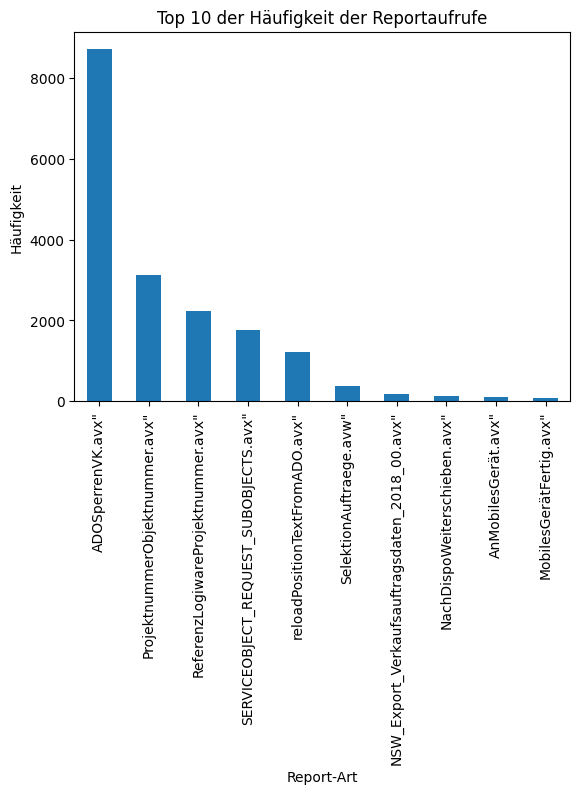

In [39]:
# Erstelle ein Balkendiagramm
ax = counts.plot(kind='bar')

# Füge Titel und Achsenbeschriftungen hinzu
ax.set_title('Top 10 der Häufigkeit der Reportaufrufe')
ax.set_xlabel('Report-Art')
ax.set_ylabel('Häufigkeit')

# Zeige das Diagramm an
plt.show()

C:\Users\medo\AppData\Local\Temp\ipykernel_7236\2683179983.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_reports = df_grouped.groupby('Report').sum().nlargest(10, 'count').index.values
C:\Users\medo\AppData\Local\Temp\ipykernel_7236\2683179983.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_10_sorted = df_top_10.groupby('Report').sum().sort_values('count', ascending=False).reset_index()


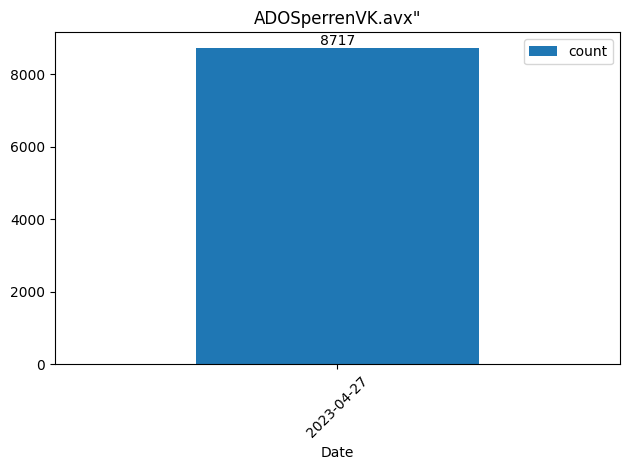

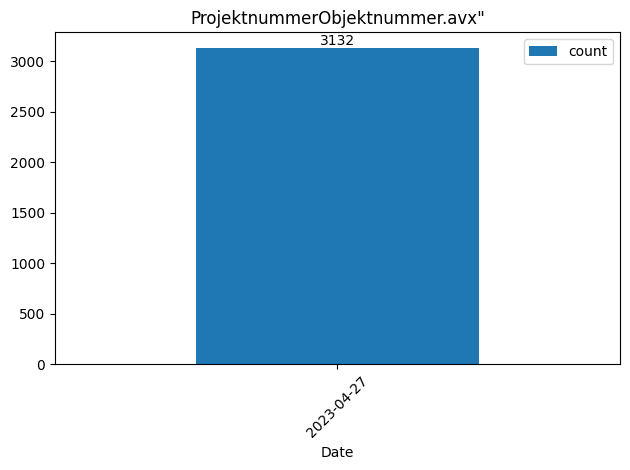

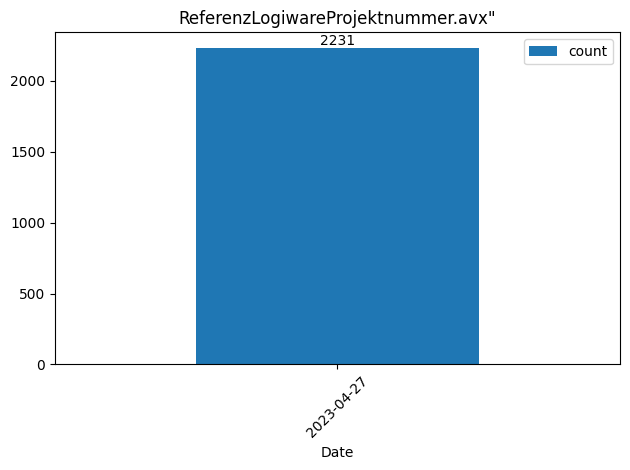

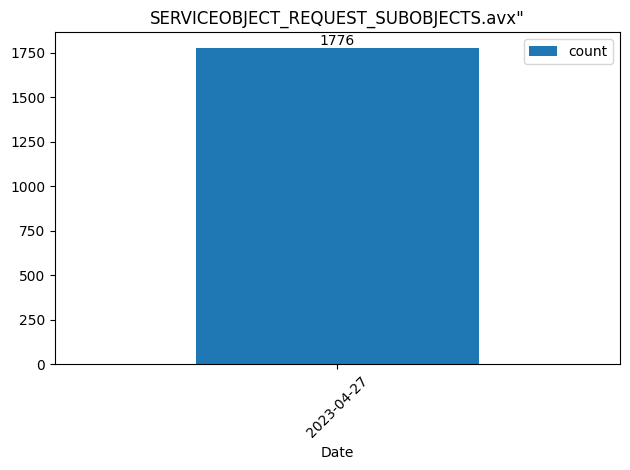

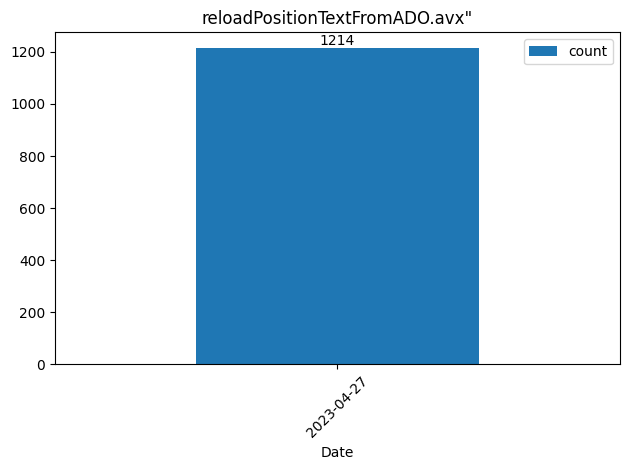

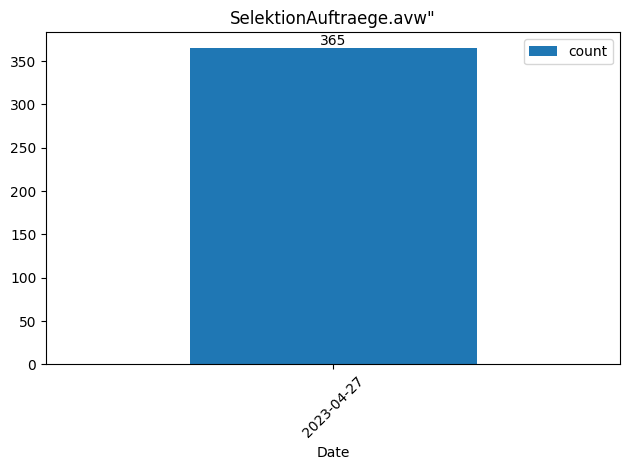

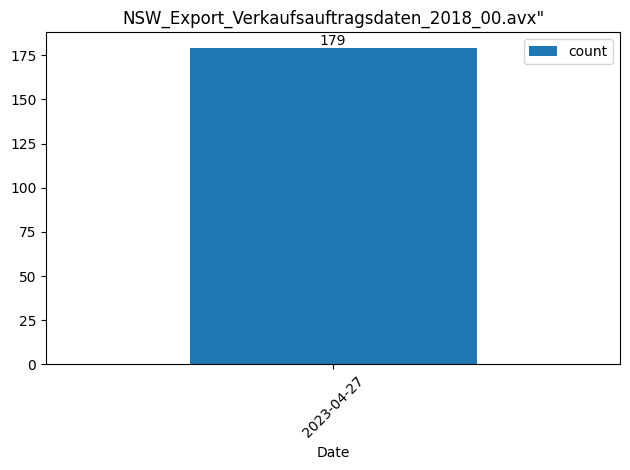

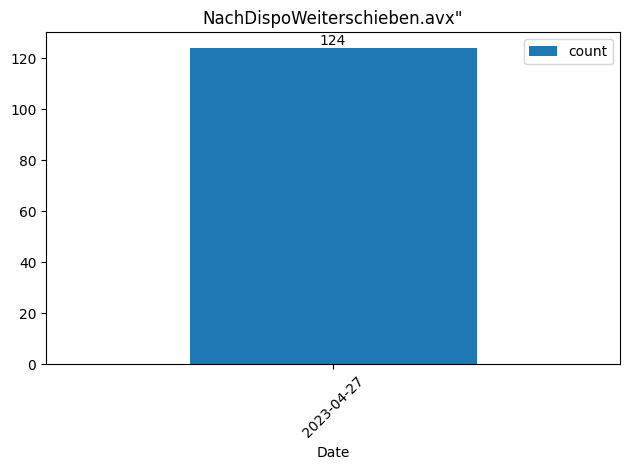

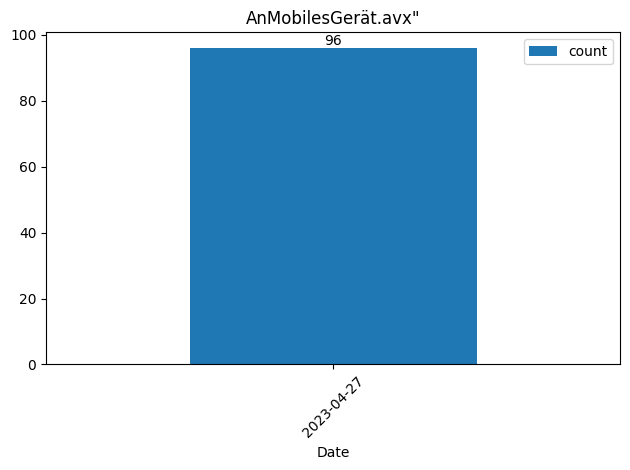

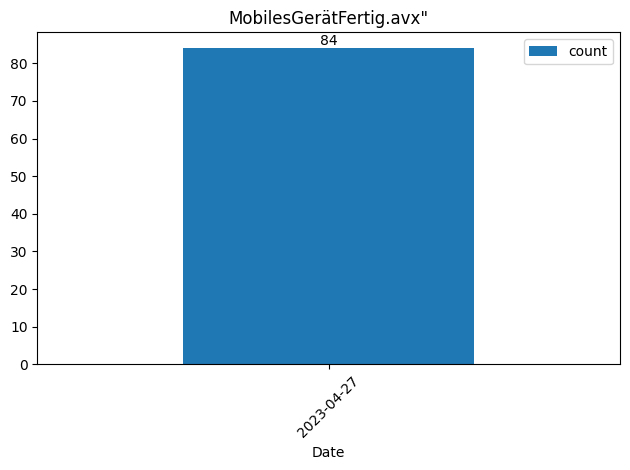

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Datum konvertieren
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Nur das Datum extrahieren
df['Date'] = df['TimeStamp'].dt.date

# Gruppieren nach Report und Datum und zählen
df_grouped = df.groupby([df['Report'], df['Date']]).size().reset_index(name='count')

# Top 10 Berichte auswählen
top_10_reports = df_grouped.groupby('Report').sum().nlargest(10, 'count').index.values
df_top_10 = df_grouped[df_grouped['Report'].isin(top_10_reports)]
unique_reports = df_top_10['Report'].unique().tolist()

# Nach Gesamtzählungen sortieren
df_top_10_sorted = df_top_10.groupby('Report').sum().sort_values('count', ascending=False).reset_index()


###
# Schleife über die Berichte und Erstellung der Plots
for report in df_top_10_sorted['Report']:
    # DataFrame für den aktuellen Bericht erstellen
    df_report = df_top_10[df_top_10['Report'] == report]
    # Plot erstellen
    ax = df_report.plot.bar(x='Date', y='count', title=report, rot=45)
    # Beschriftungen hinzufügen
    for i, v in enumerate(df_report['count']):
        ax.bar_label(ax.containers[0], label=int(v), label_type='edge')
    plt.tight_layout()
    plt.show() # Plot anzeigen
###